Thanks to both of you for your inputs today!  Attached are the DeepSTARR paper and supplement, and below is the current list of fields for the input file, and an excerpt from the paper.
 
```
HepG2   chr9:102223-102492   RefSequence   log2FC   (reps:DNA-counts,...)  (reps:RNA-counts,...)   CradleBiasFactor
``` 
Best,


while Kari works on finding the right files to use here, tryin stictching together the code to count in windows, using a sliding window approach


In [3]:
%%bash
mkdir -p /data/reddylab/Alex/collab/20221017_Bill/results
mkdir -p /data/reddylab/Alex/collab/20221017_Bill/data
mkdir -p /data/reddylab/Alex/collab/20221017_Bill/logs


In [1]:
%%bash
export LD_LIBRARY_PATH="/data/reddylab/Alex/software/miniforge3/envs/alex_py3/lib/:${LD_LIBRARY_PATH}"
source /data/reddylab/Alex/software/miniforge3/bin/activate alex_py3

sbatch \
    --account=reddylab \
    --mem=8G \
    --array=1,2,3,4 \
    --cpus-per-task=1 \
    -o logs/bwtool.window_counts_600_50.%a.out \
    <<'EOF'
#!/bin/bash
# ,/data/reddylab/kstrouse/superstarr/input_libs/A001/nextseq/processing/starr_seq/A001_nextseq-pe/rep3.f3q10.sorted.dedup.rpkm.bw,/data/reddylab/kstrouse/superstarr/input_libs/A001/nextseq/processing/starr_seq/A001_nextseq-pe/rep4.f3q10.sorted.dedup.rpkm.bw
bwtool window 600 \
    /data/reddylab/kstrouse/superstarr/input_libs/A001/nextseq/processing/starr_seq/A001_nextseq-pe/rep${SLURM_ARRAY_TASK_ID}.f3q10.sorted.dedup.raw.bw \
    -step=50 \
    -skip-NA \
| awk -vOFS="\t" 'NR==1{ split($4, vv, ","); nwins=length(vv)}{tot=0; split($4, vv, ","); for (ii=1; ii<=nwins; ii+=1){tot+=vv[ii]} print $1,$2,$3,tot/nwins}' \
| awk '$4!=0' \
> /data/reddylab/Alex/collab/20221017_Bill/data/rep${SLURM_ARRAY_TASK_ID}.f3q10.sorted.dedup.w600s50.bdg
EOF

Submitted batch job 120185


In [3]:
%%bash
export LD_LIBRARY_PATH="/data/reddylab/Alex/software/miniforge3/envs/alex_py3/lib/:${LD_LIBRARY_PATH}"
source /data/reddylab/Alex/software/miniforge3/bin/activate alex_py3

sbatch \
    --account=reddylab \
    --mem=8G \
    --array=1 \
    --cpus-per-task=1 \
    -o logs/bwtool.window_counts_600_50.outputs.%a.out \
    <<'EOF'
#!/bin/bash
# ,/data/reddylab/kstrouse/superstarr/input_libs/A001/nextseq/processing/starr_seq/A001_nextseq-pe/rep3.f3q10.sorted.dedup.rpkm.bw,/data/reddylab/kstrouse/superstarr/input_libs/A001/nextseq/processing/starr_seq/A001_nextseq-pe/rep4.f3q10.sorted.dedup.rpkm.bw
#     /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20201124/nextseq/processing/starr_seq/A001_K562_20201124_nextseq-pe/A001-K562-rep${SLURM_ARRAY_TASK_ID}-nextseq.f3q10.sorted.dedup.raw.bw \
    # /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep${SLURM_ARRAY_TASK_ID}.f3q10.sorted.dedup.raw.bw \
bwtool window 600 \
    /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20201124/nextseq/processing/starr_seq/A001_K562_20201124_nextseq-pe/A001-K562-rep${SLURM_ARRAY_TASK_ID}-nextseq.f3q10.sorted.dedup.raw.bw \
    -step=50 \
    -skip-NA \
| awk -vOFS="\t" 'NR==1{ split($4, vv, ","); nwins=length(vv)}{tot=0; split($4, vv, ","); for (ii=1; ii<=nwins; ii+=1){tot+=vv[ii]} print $1,$2,$3,tot/nwins}' \
| awk '$4!=0' \
> /data/reddylab/Alex/collab/20221017_Bill/data/A001-K562-rep${SLURM_ARRAY_TASK_ID}-nextseq.f3q10.sorted.dedup.w600s50.bdg
EOF

Submitted batch job 120191


In [2]:
(3+3+3+3+2+2+2+2+1+2)/9.

2.5555555555555554

In [2]:
# %load_ext memory_profiler
# def lol(x):
#     return x
# %memit lol(500)


In [ ]:
# import os
# import numpy as np
# import pandas as pd
# import pathlib

# data_dir = '/data/reddylab/Alex/collab/20221017_Bill/data'

# # First, find all common fragments in the inputs
# df = None
# for f in os.listdir(data_dir):
#     if f.endswith('.w600s50.bdg') and ('A001-K562' in f) :
#         print(f)
#         df_tmp = pd.read_csv(os.path.join(data_dir, f),
#                          sep='\t', 
#                          names = ['chrom', 'start', 'end', 'count'])
#         df_tmp.index = df_tmp['chrom'] + "_" + df_tmp['start'].astype('str') + "_" + df_tmp['end'].astype('str')
#         if df is None:
#             df = df_tmp.index
#         else:
#             df = df.join(df_tmp.index, how='inner')
# input_df = df.copy()

# # for treatment in ['DMSO', 'Dex']:
# for treatment in ["AZD2906", 'AZD9567','CORT108297','CpdA','GW870086','Hydrocortisone','Mapracorat','RU486','ZK216348']: #'AZD2906',
#     outdir = f'{data_dir}/by_treatment/{treatment}'

#     df = None
#     for f in os.listdir(data_dir):
#         if f.endswith('.w300s50.bdg') and (treatment in f) :
#             print(f)
#             df_tmp = pd.read_csv(os.path.join(data_dir, f),
#                              sep='\t', 
#                              names = ['chrom', 'start', 'end', 'count'])
#             df_tmp.index = df_tmp['chrom'] + "_" + df_tmp['start'].astype('str') + "_" + df_tmp['end'].astype('str')
#             if df is None:
#                 df = df_tmp.index
#             else:
#                 df = df.join(df_tmp.index, how='inner')

#     # merge with inputs
#     df = df.join(input_df, how='inner')
    
#     pathlib.Path(outdir).mkdir(exist_ok=True)
#     for f in os.listdir(data_dir):
#         if f.endswith('.w300s50.bdg') and (treatment in f or 'Input' in f) :
#             print(f)
#             df_tmp = pd.read_csv(os.path.join(data_dir, f),
#                              sep='\t', 
#                              names = ['chrom', 'start', 'end', 'count'])
#             df_tmp.index = df_tmp['chrom'] + "_" + df_tmp['start'].astype('str') + "_" + df_tmp['end'].astype('str')
#             df_tmp.join(pd.DataFrame(index=df), how='inner')\
#                 .to_csv(os.path.join(outdir, f.replace('.bdg', '.in_common_win.bdg')), 
#                         sep='\t', index = False)


Find set of windows with data for all replicates/conditions

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/data/reddylab/Alex/collab/20221017_Bill/data/rep2.f3q10.sorted.dedup.w600s50.bdg', sep='\t', names = ['chrom', 'start', 'end', 'count'])
df.index = df['chrom'] + "_" + df['start'].astype('str') + "_" + df['end'].astype('str')
df_tmp = pd.read_csv('/data/reddylab/Alex/collab/20221017_Bill/data/rep3.f3q10.sorted.dedup.w600s50.bdg', sep='\t', names = ['chrom', 'start', 'end', 'count'])
df_tmp.index = df_tmp['chrom'] + "_" + df_tmp['start'].astype('str') + "_" + df_tmp['end'].astype('str')
df = df.index.join(df_tmp.index, how='inner')
df_tmp = pd.read_csv('/data/reddylab/Alex/collab/20221017_Bill/data/rep4.f3q10.sorted.dedup.w600s50.bdg', sep='\t', names = ['chrom', 'start', 'end', 'count'])
df_tmp.index = df_tmp['chrom'] + "_" + df_tmp['start'].astype('str') + "_" + df_tmp['end'].astype('str')
df = df.join(df_tmp.index, how='inner')



In [ ]:
# import numpy as np
# import pandas as pd
# bedgraphs = [
#     '/data/reddylab/Alex/collab/20221017_Bill/data/A001-K562-rep2-nextseq.f3q10.sorted.dedup.w600s50.bdg', 
#     '/data/reddylab/Alex/collab/20221017_Bill/data/A001-K562-rep3-nextseq.f3q10.sorted.dedup.w600s50.bdg', 
#     '/data/reddylab/Alex/collab/20221017_Bill/data/A001-K562-rep4-nextseq.f3q10.sorted.dedup.w600s50.bdg' 
# ]
# # df = pd.read_csv(bedgraphs[0], sep='\t', names = ['chrom', 'start', 'end', 'count'])
# # df.index = df['chrom'] + "_" + df['start'].astype('str') + "_" + df['end'].astype('str')
# for ii in bedgraphs[1:]:
#     df_tmp = pd.read_csv(ii, sep='\t', names = ['chrom', 'start', 'end', 'count'])
#     df_tmp.index = df_tmp['chrom'] + "_" + df_tmp['start'].astype('str') + "_" + df_tmp['end'].astype('str')
#     df = df.index.join(df_tmp.index, how='inner')


In [ ]:
for rep in [1,2,3]:
    df_tmp = pd.read_csv(f'/data/reddylab/Alex/collab/20221017_Bill/data/A001-K562-rep{rep}-nextseq.f3q10.sorted.dedup.w600s50.bdg', sep='\t', names = ['chrom', 'start', 'end', 'count'])
    df_tmp.index = df_tmp['chrom'] + "_" + df_tmp['start'].astype('str') + "_" + df_tmp['end'].astype('str')
    df_tmp.join(pd.DataFrame(index=df), how='inner')\
        .to_csv(f'/data/reddylab/Alex/collab/20221017_Bill/data/A001-K562-rep{rep}-nextseq.f3q10.sorted.dedup.w600s50.in_common_win.bdg', 
                sep='\t', index = False)


In [ ]:
for rep in [2,3,4]:
    df_tmp = pd.read_csv(f'/data/reddylab/Alex/collab/20221017_Bill/data/rep{rep}.f3q10.sorted.dedup.w600s50.bdg', sep='\t', names = ['chrom', 'start', 'end', 'count'])
    df_tmp.index = df_tmp['chrom'] + "_" + df_tmp['start'].astype('str') + "_" + df_tmp['end'].astype('str')
    df_tmp.join(pd.DataFrame(index=df), how='inner')\
        .to_csv(f'/data/reddylab/Alex/collab/20221017_Bill/data/rep{rep}.f3q10.sorted.dedup.w600s50.in_common_win.bdg', 
                sep='\t', index = False)


In [ ]:
%%bash
for THRES in 100 150 200;
do
    paste -d"\t" \
        <(cat /data/reddylab/Alex/collab/20221017_Bill/data/rep2.f3q10.sorted.dedup.w600s50.in_common_win.bdg) \
        <(cat /data/reddylab/Alex/collab/20221017_Bill/data/rep3.f3q10.sorted.dedup.w600s50.in_common_win.bdg) \
        <(cat /data/reddylab/Alex/collab/20221017_Bill/data/rep4.f3q10.sorted.dedup.w600s50.in_common_win.bdg) \
        <(cat /data/reddylab/Alex/collab/20221017_Bill/data/A001-K562-rep1-nextseq.f3q10.sorted.dedup.w600s50.in_common_win.bdg) \
        <(cat /data/reddylab/Alex/collab/20221017_Bill/data/A001-K562-rep2-nextseq.f3q10.sorted.dedup.w600s50.in_common_win.bdg) \
        <(cat /data/reddylab/Alex/collab/20221017_Bill/data/A001-K562-rep3-nextseq.f3q10.sorted.dedup.w600s50.in_common_win.bdg) \
    | awk -vTHRES=${THRES} -vOFS="\t" 'BEGIN{print "chrom\tstart\tend\tinput_rep1\tinput_rep2\tinput_rep3\toutput_rep1\toutput_rep2\toutput_rep3"}($4+$8+$12>THRES) && ($16+$20+$24>THRES){print $1,$2,$3,$4,$8,$12,$16,$20,$24}' \
    > /data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_${THRES}.bdg
done

In [ ]:
%%bash
for THRES in 100 150 200;
do
    paste -d"\t" \
        <(cat /data/reddylab/Alex/collab/20221017_Bill/data/rep2.f3q10.sorted.dedup.w600s50.in_common_win.bdg) \
        <(cat /data/reddylab/Alex/collab/20221017_Bill/data/rep3.f3q10.sorted.dedup.w600s50.in_common_win.bdg) \
        <(cat /data/reddylab/Alex/collab/20221017_Bill/data/rep4.f3q10.sorted.dedup.w600s50.in_common_win.bdg) \
        <(cat /data/reddylab/Alex/collab/20221017_Bill/data/A001-K562-rep1-nextseq.f3q10.sorted.dedup.w600s50.in_common_win.bdg) \
        <(cat /data/reddylab/Alex/collab/20221017_Bill/data/A001-K562-rep2-nextseq.f3q10.sorted.dedup.w600s50.in_common_win.bdg) \
        <(cat /data/reddylab/Alex/collab/20221017_Bill/data/A001-K562-rep3-nextseq.f3q10.sorted.dedup.w600s50.in_common_win.bdg) \
    | awk -vTHRES=${THRES} -vOFS="\t" 'BEGIN{print "chrom\tstart\tend\tinput_rep1\tinput_rep2\tinput_rep3\toutput_rep1\toutput_rep2\toutput_rep3"}($4+$8+$12>THRES){print $1,$2,$3,$4,$8,$12,$16,$20,$24}' \
    > /data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_${THRES}.thres_dna_only.bdg
done

Add lib.sizes

In [3]:
%%bash
cat /data/reddylab/kstrouse/superstarr/input_libs/A001/nextseq/processing/starr_seq/A001_nextseq-pe/rep{2,3,4}*.R1.trimmed.read_count.txt > /data/reddylab/Alex/collab/20221017_Bill/data/K562.starrseq.A001_combined.lib_sizes.txt.tmp
cat /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20201124/nextseq/processing/starr_seq/A001_K562_20201124_nextseq-pe/A001-K562-rep*.R1.trimmed.read_count.txt /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep*.R1.trimmed.read_count.txt >> /data/reddylab/Alex/collab/20221017_Bill/data/K562.starrseq.A001_combined.lib_sizes.txt.tmp
paste -d"\t" \
    <(head -n1 /data/reddylab/Alex/collab/20221017_Bill/data/combined.input_and_output.gt_100.bdg  | cut -f4- | tr '\t' '\n') \
    /data/reddylab/Alex/collab/20221017_Bill/data/K562.starrseq.A001_combined.lib_sizes.txt.tmp \
> /data/reddylab/Alex/collab/20221017_Bill/data/K562.starrseq.A001_combined.lib_sizes.txt \
&& rm -f /data/reddylab/Alex/collab/20221017_Bill/data/K562.starrseq.A001_combined.lib_sizes.txt.tmp 

In [1]:
1.49459e+09 +1

1494590001.0

In [1]:
import numpy as np

import pandas as pd
for thres in [100, 150, 200]:
    df = pd.read_csv(f'/data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_{thres}.bdg', sep='\t')
#     df.astype(int, errors='ignore')\
#         .to_csv(f'/data/reddylab/Alex/collab/20221017_Bill/data/combined.input_and_output.gt_{thres}.txt', index=False, sep='\t')
    df = df.astype(int, errors='ignore')
    df.iloc[:, 3:] = df.iloc[:, 3:]/df.iloc[:, 3:].sum()*1e6
    
    log2FC_tmp = (np.log2((0.001+df.iloc[:, 6:].mean(axis=1)) / 
           (0.001+df.iloc[:, 3:6].mean(axis=1))))
    df = None
    df = pd.read_csv(f'/data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_{thres}.bdg', sep='\t')
    df = df.astype(int, errors='ignore')
    df['log2FC'] = log2FC_tmp
    df.to_csv(f'/data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_{thres}.log2FC.txt', 
              sep='\t', index=False, float_format='%.5f')

In [2]:
import numpy as np

import pandas as pd
for thres in [100, 150, 200]:
    df = pd.read_csv(f'/data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_{thres}.thres_dna_only.bdg', sep='\t')
#     df.astype(int, errors='ignore')\
#         .to_csv(f'/data/reddylab/Alex/collab/20221017_Bill/data/combined.input_and_output.gt_{thres}.txt', index=False, sep='\t')
    df = df.astype(int, errors='ignore')
    df.iloc[:, 3:] = df.iloc[:, 3:]/df.iloc[:, 3:].sum()*1e6
    
    log2FC_tmp = (np.log2((0.001+df.iloc[:, 6:].mean(axis=1)) / 
           (0.001+df.iloc[:, 3:6].mean(axis=1))))
    df = None
    df = pd.read_csv(f'/data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_{thres}.thres_dna_only.bdg', sep='\t')
    df = df.astype(int, errors='ignore')
    df['log2FC'] = log2FC_tmp
    df.to_csv(f'/data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_{thres}.thres_dna_only.log2FC.txt', 
              sep='\t', index=False, float_format='%.5f')

In [ ]:
awk -vOFS="\t" 'NR==1{nwins=length(vv)}{tot=0; split($4, vv, ","); for (ii=1; ii<=nwins; ii+=1){tot+=vv[ii]} print $1,$2,$3,tot/nwins}' \


In [3]:
%%bash
for THRES in 100 150 200;
do
    tail -n+2 /data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_${THRES}.log2FC.txt \
    | cut -f1-3 \
    | bedtools getfasta \
        -fi /data/reddylab/Reference_Data/Genomes/hg38/GCA_000001405.15_GRCh38_full_analysis_set.fna \
        -bed stdin \
    > /data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_${THRES}.sequences.fa

    tail -n+2 /data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_${THRES}.thres_dna_only.log2FC.txt \
    | cut -f1-3 \
    | bedtools getfasta \
        -fi /data/reddylab/Reference_Data/Genomes/hg38/GCA_000001405.15_GRCh38_full_analysis_set.fna \
        -bed stdin \
    > /data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_${THRES}.thres_dna_only.sequences.fa

done

In [4]:
%%bash
for THRES in 100 150 200;
do
    paste -d"\t" /data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_${THRES}.log2FC.txt \
        <(cat <(echo sequence) <(cat /data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_${THRES}.sequences.fa | awk 'NR%2==0')) \
    | gzip -c \
        > /data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_${THRES}.log2FC.sequence.txt.gz
done

In [5]:
%%bash
for THRES in 100 150 200;
do
    paste -d"\t" /data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_${THRES}.thres_dna_only.log2FC.txt \
        <(cat <(echo sequence) <(cat /data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_${THRES}.thres_dna_only.sequences.fa | awk 'NR%2==0')) \
    | gzip -c \
        > /data/reddylab/Alex/collab/20221017_Bill/data/K562.combined.input_and_output.w600s50.gt_${THRES}.thres_dna_only.log2FC.sequence.txt.gz
done

In [ ]:
bwtool window 300 /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/K562_GROcap_mn.bw 
--step=100000 -skip-NA | head -n5 |  awk -vOFS="\t" 'NR==1{ split($4, vv, ","); nwins=length(vv)}{tot=0; split($4, vv, ","); for (ii=1; ii<=nwins; ii+=1){tot+=vv[ii]} print $1,$2,$3,tot/nwins}'

**22-11-08 Notes**
Bill would like to compare the log2FC values I calculated (CPMs) with those computed with DESeq2. Because it would take a minute to run DESeq2 on the entire dataset, try using only one chromosome. 

In [35]:
%%bash
THRES=200
CHROM="chr9"

for THRES in 100 150;
do
    echo -e "peak\twgstarr.A001.input.rep1\twgstarr.A001.input.rep2\twgstarr.A001.input.rep3\twgstarr.A001.output.rep1\twgstarr.A001.output.rep2\twgstarr.A001.output.rep3" \
        > /data/reddylab/Alex/collab/20221017_Bill/data/combined.input_and_output.gt_${THRES}.counts.${CHROM}.txt
    gzip -dc /data/reddylab/Alex/collab/20221017_Bill/data/combined.input_and_output.gt_${THRES}.log2FC.sequence.txt.gz \
    | /bin/grep -wP "^${CHROM}" \
    | awk -vOFS="\t" '{print $1"_"$2"_"$3, $4,$5,$6,$7,$8,$9}' \
    >> /data/reddylab/Alex/collab/20221017_Bill/data/combined.input_and_output.gt_${THRES}.counts.${CHROM}.txt

#     gzip -dc /data/reddylab/Alex/collab/20221017_Bill/data/combined.input_and_output.gt_${THRES}.log2FC.sequence.txt.gz \
#     | /bin/grep -wP "^${CHROM}" \
#     | awk -vOFS="\t" '{print $1"_"$2"_"$3,$10}' \
#     > /data/reddylab/Alex/collab/20221017_Bill/data/combined.input_and_output.gt_${THRES}.cpm_log2fc.${CHROM}.txt
done

In [ ]:
# %load /data/reddylab/Alex/reddylab_utils/scripts/de.deseq2.R
#!/usr/bin/env Rscript
suppressPackageStartupMessages(library(DESeq2))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(matrixStats))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library("argparse"))

# Rewrite DESeq2 plotPCA function to specify which PC to plot
plotPCA_ = function(object, intgroup="condition", ntop=500, returnData=FALSE, pcX=1, pcY=2, ignoreReps=FALSE)
{
  # calculate the variance for each gene
  rv <- rowVars(assay(object))

  # select the ntop genes by variance
  select <- order(rv, decreasing=TRUE)[seq_len(min(ntop, length(rv)))]

  # perform a PCA on the data in assay(x) for the selected genes
  pca <- prcomp(t(assay(object)[select,]))

  # the contribution to the total variance for each component
  percentVar <- pca$sdev^2 / sum( pca$sdev^2 )

  if (!all(intgroup %in% names(colData(object)))) {
    stop("the argument 'intgroup' should specify columns of colData(dds)")
  }

  intgroup.df <- as.data.frame(colData(object)[, intgroup, drop=FALSE])  
  # add the intgroup factors together to create a new grouping factor
  group <- if (length(intgroup) > 1) {
    factor(apply( intgroup.df, 1, paste, collapse=":"))
  } else {
    colData(object)[[intgroup]]
  }
    
  if (returnData) {
    attr(d, "percentVar") <- c(percentVar[pcX], percentVar[pcY])
    return(d)
  }
  rep <- colData(object)[['rep']]
#   rep <- row.names(colData(dds))
  if (!ignoreReps){
      # Add replicate info
#       rep <- colData(object)[['rep']]

        # assembly the data for the plot
      d <- data.frame(PCX=pca$x[,pcX], PCY=pca$x[,pcY], group=group, rep=rep, intgroup.df, name=colnames(object))

      ggplot(data=d, aes_string(x="PCX", y="PCY", color="group", shape="rep")) + geom_point(size=3) + 
        xlab(paste0("PC", pcX, ": ",round(percentVar[pcX] * 100),"% variance")) +
          ylab(paste0("PC", pcY, ": ",round(percentVar[pcY] * 100),"% variance")) +
      scale_shape_manual(values=seq(0,15))
  } else {
#       batch <- as.factor(colData(object)[['batch']])
        # assembly the data for the plot
      d <- data.frame(PCX=pca$x[,pcX], PCY=pca$x[,pcY], group=group, intgroup.df, name=colnames(object))

      ggplot(data=d, aes_string(x="PCX", y="PCY", color="group")) + 
          geom_point(size=3) +
          geom_text(aes(label=rep),hjust=0, vjust=0) +
          xlab(paste0("PC", pcX, ": ",round(percentVar[pcX] * 100),"% variance")) +
          ylab(paste0("PC", pcY, ": ",round(percentVar[pcY] * 100),"% variance")) +
      scale_shape_manual(values=seq(0,15))
  }
#     + coord_fixed()
}

# create parser object
parser <- ArgumentParser()

# specify our desired options 
# by default ArgumentParser will add an help option 
parser$add_argument("-c", "--controls", nargs="+", help="Featurecounts file for controls")
parser$add_argument("-t", "--treatments", nargs="+", help="Featurecounts file for treatments")
parser$add_argument("--counts", nargs="+", help="Count matrix (or matrices). Count columns should match controls and treatments specified")
parser$add_argument("--outdir", help="Output directory where result files will be saved.")
parser$add_argument("--lfcShrink", required=F, 
                    help="Perform effect size shrinkage (types: normal, apeglm and ashr. See Zhu, Ibrahim, and Love 2018).")
parser$add_argument("--lib-sizes", required=F, 
                    help="Use library sizes as scaling factor overwritting the default total counts per library")
parser$add_argument("--counts-skip-ncols", required=F, 
                    help="Skip n first columns from count matrix")
parser$add_argument("--counts-only-treatments-and-controls", required=F, action="store_true", default=FALSE,
                    help="Keep only the counts from the treatment and control samples (affects dispersion estimates, but can speed up things significantly)")
parser$add_argument("--no-filter", required=F, action="store_true", default=FALSE,
                    help="By default, lowly expressed regions in only 1 sample are removed. Specify if no filter should be done")
parser$add_argument("--no-model-reps", required=F, action="store_true", default=FALSE,
                    help="Ignore replicates when plotting PCA components")
parser$add_argument("--norm-by-ercc", required=F, action="store_true", default=FALSE,
                    help="Normalized using ERCC counts (probes staring by ERCC-)")
parser$add_argument("--samples-info-df", required=F,
                    help="Optionally, provide a DataFrame with sample info (which in DESeq2 is used as column data)")
parser$add_argument("--design-formula", required=F,
                    help="Optionally, if provided, use this design formular instead of trying to infer it from data")
parser$add_argument("--control-substr", required=F, default=FALSE,
                    help="Optionally, provide a substr found in rownames to identify control counts (e.g. housekeeping genes, spike-ins, etc.). It changes the estimateSizeFactors function")
parser$add_argument("--pca-int-groups", required=F, nargs='*',
                    help="Optionally, columns from design formula to be used in PCA analysis")
parser$add_argument("--rep-sep", required=F, default=".",
                    help="Optionally, replicate separator in sample names")

# get command line options, if help option encountered print help and exit,
# otherwise if options not found on command line then set defaults, 
args <- parser$parse_args()
args
treatments <- args$treatments
controls <- args$controls
outdir <- args$outdir

ff <- args$counts
dd <- lapply(ff, read.csv, header=TRUE, sep="\t", stringsAsFactors=FALSE, row.names=1)
xx <- do.call(cbind, dd)

countData <- xx
if (!is.null(args$counts_skip_ncols)){
    countData <- xx[, -c(1:args$counts_skip_ncols)]
}

colnames(countData)[colnames(countData)%in%append(treatments, controls)]
if (args$counts_only_treatments_and_controls){
#     countData <- xx %>% select(unlist(append(treatments, controls)))
    countData <- subset(xx, select = colnames(countData)[colnames(countData)%in%append(treatments, controls)])
}

controls
treatments
samples_no_reps <- gsub(paste0("(.*)\\", args$rep_sep, ".*"), "\\1", colnames(countData))
# samples_no_reps <- gsub("(.*)\\..*", "\\1", colnames(countData))
reps <- gsub(paste0(".*\\", args$rep_sep, "(.*)"), "\\1", colnames(countData))
# reps <- gsub(".*\\.(.*)", "\\1", colnames(countData))
conditions <- samples_no_reps
conditions

# Reorder condition comparisons to always compute log2 fold changes of treat vs control
conditions_pair <- unique(conditions)
control_conditions <- unique(gsub(paste0("(.*)\\", args$rep_sep, ".*"), "\\1", controls)) #"(.*)\\..*"
treatment_conditions <- unique(gsub(paste0("(.*)\\", args$rep_sep, ".*"), "\\1", treatments))

if (!is.null(args$samples_info_df)){
    colData <- read.csv(args$samples_info_df, 
                        header=TRUE, sep="\t", 
                        stringsAsFactors=TRUE, row.names=1)
    colData <- colData[colnames(countData), ]
    design_formula_str <- paste(c("~ ", paste(colnames(colData), collapse = " + ")), collapse='')
    if (!is.null(args$design_formula)){
        design_formula_str <- args$design_formula
    }
    print(design_formula_str)
    dds <- DESeqDataSetFromMatrix(countData = countData,
                                  colData = colData,
                                  design = formula(design_formula_str))
    intgroup <- colnames(colData)  # For PCA plots
    # Relevel to setup control as reference
    dds$condition <- relevel(dds$condition, ref = control_conditions)
} else {
    intgroup <- c("condition")  # For PCA plots
    colData <- data.frame(condition=conditions, rep=reps, row.names=colnames(countData))    
    if (!(args$no_model_reps)){
        print(reps)
    #     colData <- data.frame(condition=conditions, rep=reps, row.names=colnames(countData))
        dds <- DESeqDataSetFromMatrix(countData = countData,
                                      colData = colData,
                                      design = ~ rep + condition)
    } else {
    #     colData <- data.frame(condition=conditions, row.names=colnames(countData))
        dds <- DESeqDataSetFromMatrix(countData = countData,
                                      colData = colData,
                                      design = ~ condition)
    }
    # Relevel to setup control as reference
    dds$condition <- relevel(dds$condition, ref = control_conditions)
} 


# Optionally: if lib_sizes provided, manually assigned scale factors
if (!is.null(args$lib_sizes)){
    lib_sizes <- read.table(args$lib_sizes, sep="\t", row.names=1)
    lib_sizes <- lib_sizes[colnames(countData), ]
    lib_sizes_scale_factors <- lib_sizes/min(lib_sizes)
    sizeFactors(dds) <- lib_sizes_scale_factors    
}

if (args$norm_by_ercc){
    ercc_genes <- countData[grepl("^ERCC", rownames(countData)), ]
    dds <- DESeqDataSetFromMatrix(countData = countData[!grepl("^ERCC", rownames(countData)), ],
                              colData = colData,
                              design = ~ condition)
    ercc_dds <- DESeqDataSetFromMatrix(countData = ercc_genes, 
                                       colData = colData,
                                       design = ~ condition)
    sizeFactors(dds) <-  sizeFactors(estimateSizeFactors(ercc_dds))
    # Relevel to setup control as reference
    dds$condition <- relevel(dds$condition, ref = control_conditions)
}

# Pre-filtering low count genes
# dds <- dds[ rowSums(counts(dds)) > 5, ]
if (!args$no_filter){
    dds <- dds[ rowSums(fpm(dds, robust = FALSE)>=2) > 1, ]
}

# Run DESeq2
# dds <- DESeq(dds, betaPrior=FALSE)
if (is.character(args$control_substr)){
    control_idxs <- which(grepl(args$control_substr, rownames(countData)))
    dds <- estimateSizeFactors(dds, controlGenes=control_idxs)
} else {
    dds <- estimateSizeFactors(dds)
}
dds <- estimateDispersions(dds)
dds <- nbinomWaldTest(dds)


# Calculate comparison string name 
treat_vs_contr <- paste0(treatment_conditions, '_vs_', control_conditions)

# Extracting transformed values for PCA analysis
vsd <- tryCatch({
    vst(dds, blind=FALSE)
}, error = function(e){
    varianceStabilizingTransformation(dds, blind=FALSE)
})


c('condition',  
  conditions_pair[conditions_pair %in% treatment_conditions], 
  conditions_pair[conditions_pair %in% control_conditions])
res <- results(dds, 
               contrast=c('condition', 
                          conditions_pair[conditions_pair %in% treatment_conditions],
                          conditions_pair[conditions_pair %in% control_conditions]), 
               alpha=0.05, 
               independentFiltering=F)  # TODO: Test how the results look without independent filtering

# Print out result names
resultsNames(dds)

# Shrink log2 fold-change values?
if (!is.null(args$lfcShrink)){
    # If lfcShrinkage specified, save unshrunk values
    resOrdered <- res[order(res$padj),]

    # Save sorted results in a text file
    write.table(resOrdered, 
                file=paste0(outdir, '/', treat_vs_contr, '.unshrunk.txt'),
                quote = FALSE, row.names=TRUE, sep = '\t')

    # Create plot for the log2 fold changes from the treatment over the mean of normalized counts
    pdf(paste0(outdir, '/', treat_vs_contr, '.unshrunk.pdf'))
    log2fc_lim <- ceiling(max(max(res$log2FoldChange), abs(min(res$log2FoldChange))))
    plotMA(res, main=paste0("DESeq2_unshrunk_lfc_", treat_vs_contr), ylim=c(-log2fc_lim,log2fc_lim))
    dev.off()

    # Calculate lfcShrink values
    targ_contrast <- paste0("condition_", treat_vs_contr)
    res <- lfcShrink(dds, 
                     coef=targ_contrast, 
                     type=args$lfcShrink)
}

# Sort by adjusted p-value (FDR)
(resOrdered <- res[order(res$padj),])

# Print out summary of results
summary(resOrdered, alpha=0.05)

# Try IHW multiple hypothesis testing package
library("IHW")
resIHW <- results(dds, 
                  alpha=0.05,
                  contrast=c('condition', 
                          conditions_pair[conditions_pair %in% treatment_conditions],
                          conditions_pair[conditions_pair %in% control_conditions]),
                  filterFun=ihw
                 )
summary(resIHW, alpha=0.05)
resIHW <- resIHW[order(resIHW$padj),]

# Create plot for the log2 fold changes from the treatment over the mean of normalized counts
log2fc_lim <- ceiling(max(max(res$log2FoldChange), abs(min(res$log2FoldChange))))
pdf(paste0(outdir, '/', treat_vs_contr, '.pdf'))
plotMA(res, main=paste0("DESeq2_", treat_vs_contr), ylim=c(-log2fc_lim,log2fc_lim))
dev.off()

# Create plot for dispersion of normalized counts
pdf(paste0(outdir, '/', treat_vs_contr, '.mean_counts_dispersion.pdf'))
plotDispEsts(dds)
dev.off()

# To check if there are too many outliers, plot the Cook distances 
pdf(paste0(outdir, '/', treat_vs_contr, '.cook_distances.pdf'))
par(mar=c(8,5,2,2))
boxplot(log10(assays(dds)[["cooks"]]), range=0, las=2)
dev.off()

# Save sorted results in a text file
write.table(resOrdered, 
            file=paste0(outdir, '/', treat_vs_contr, '.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')

# Save IHW results in a text file
write.table(resIHW, 
            file=paste0(outdir, '/', treat_vs_contr, '.IHW.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')

# Save vsd transformed values
write.table(assay(vsd), 
            file=paste0(outdir, '/', treat_vs_contr, '.vsd.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')


rld <- rlog(dds) # rlog transformed values (typically used for clustering - see DESeq2 manual for details)
# Save rlog transformed values
write.table(assay(rld), 
            file=paste0(outdir, '/', treat_vs_contr, '.rlog.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')

# Save .RData object
save.image(paste0(outdir, '/', treat_vs_contr, '.RData'))

# Create PCA plot for the first and second PCs
pdf(paste0(outdir, '/', treat_vs_contr, '.pca.1_vs_2.pdf'), width=10, height=8)
plotPCA_(vsd, intgroup=intgroup, ntop=500, pcX=1, pcY=2, ignoreReps=args$no_model_reps)
dev.off()
# Create PCA plot for the second and third PCs
pdf(paste0(outdir, '/', treat_vs_contr, '.pca.2_vs_3.pdf'), width=10, height=8)
plotPCA_(vsd, intgroup=intgroup, ntop=500, pcX=2, pcY=3, ignoreReps=args$no_model_reps)
dev.off()
# Create PCA plot for the third and fourth PCs
pdf(paste0(outdir, '/', treat_vs_contr, '.pca.3_vs_4.pdf'), width=10, height=8)
plotPCA_(vsd, intgroup=intgroup, ntop=500, pcX=3, pcY=4, ignoreReps=args$no_model_reps)
dev.off()

cat("Done!")

In [55]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch -o /data/reddylab/Alex/collab/20221017_Bill/logs/de.deseq2.chr9.%a.out \
    --mem 16G \
    --cpus-per-task 1 \
    --array=0 \
    <<'EOF'
#!/bin/bash
THRES_LIST=(100 150 200)
THRES=${THRES_LIST[${SLURM_ARRAY_TASK_ID}]}
mkdir -p  /data/reddylab/Alex/collab/20221017_Bill/results/de.deseq2.chr9/${THRES}
Rscript  /data/reddylab/Alex/reddylab_utils/scripts/de.deseq2.R \
    --controls wgstarr.A001.input.rep1 wgstarr.A001.input.rep2 wgstarr.A001.input.rep3 \
    --treatments wgstarr.A001.output.rep1 wgstarr.A001.output.rep2 wgstarr.A001.output.rep3 \
    --no-filter \
    --counts \
        /data/reddylab/Alex/collab/20221017_Bill/data/combined.input_and_output.gt_${THRES}.counts.chr9.txt \
    --outdir \
        /data/reddylab/Alex/collab/20221017_Bill/results/de.deseq2.chr9/${THRES} \
    --lfcShrink ashr \
    --no-model-reps
    
EOF

Submitted batch job 29305583


In [1]:
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
import os
import scipy.stats as stats
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
sns.set_context('notebook')
sns.set_style('ticks')
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 20

from matplotlib import cm
from matplotlib import colors
sns.set_context('talk')


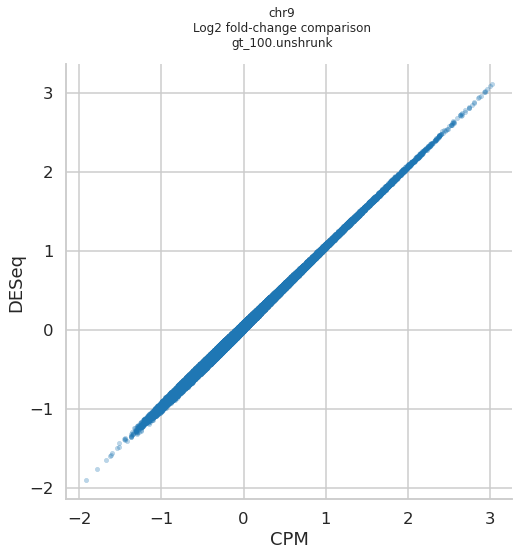

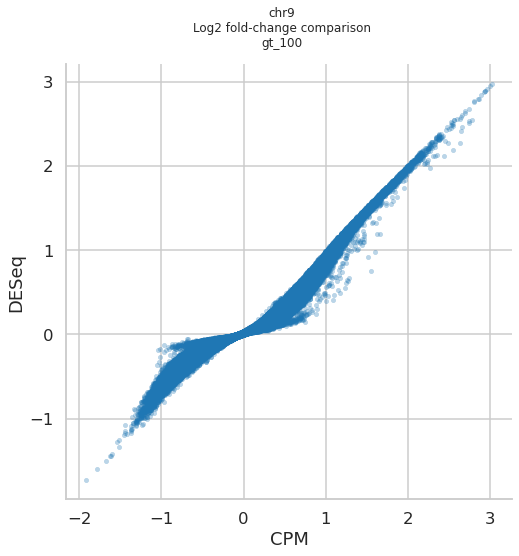

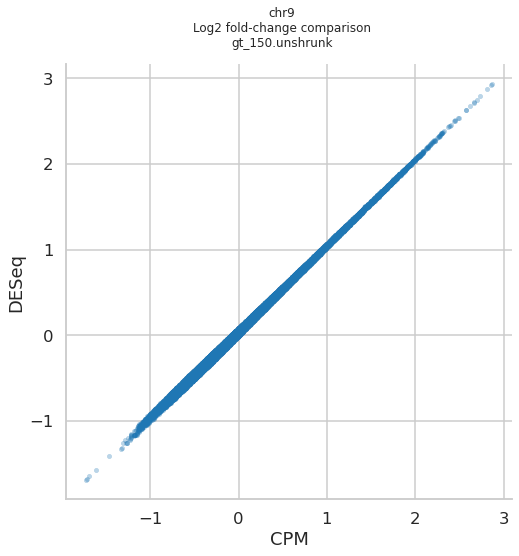

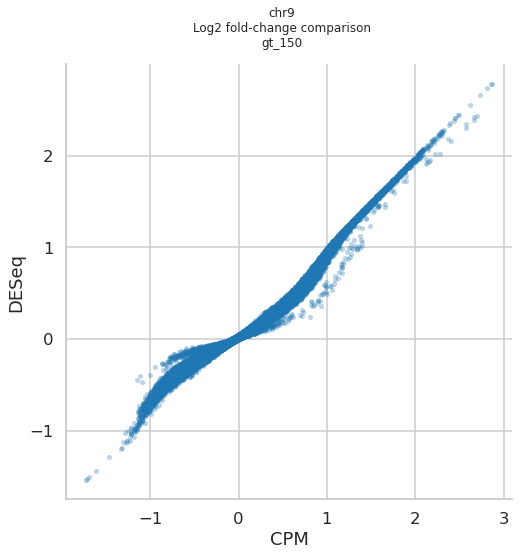

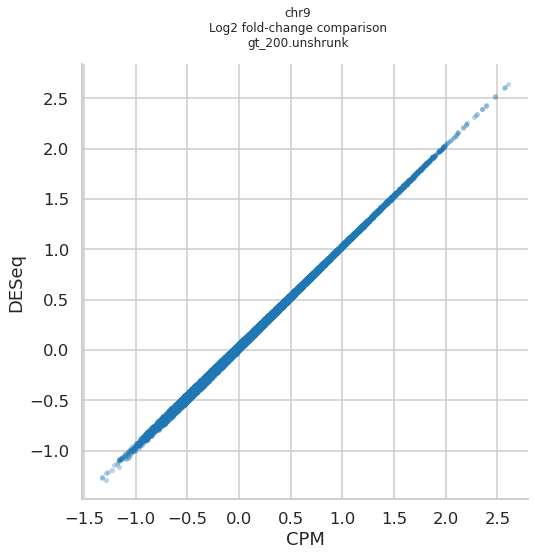

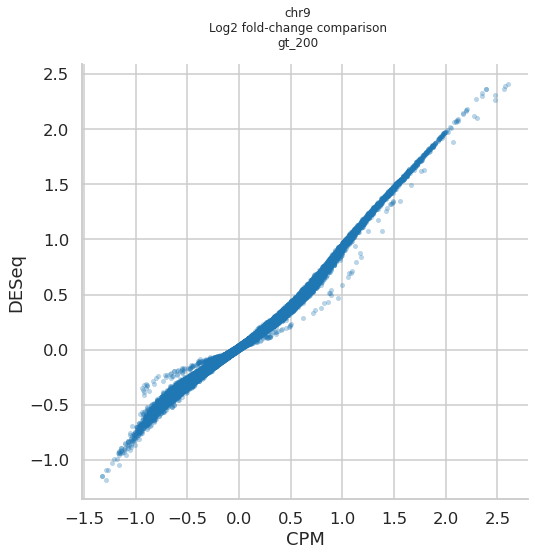

In [3]:
sns.set_style('whitegrid')
chrom="chr9"
for thres in [100, 150, 200]:
    cpm_logfc_df = pd.read_csv(f'/data/reddylab/Alex/collab/20221017_Bill/data/combined.input_and_output.gt_{thres}.cpm_log2fc.{chrom}.txt', 
                               sep='\t', index_col=0, names=['cpm_log2fc'])
    for shrinkage in ['.unshrunk', '']:
        deseq_df = pd.read_csv(f'results/de.deseq2.chr9/{thres}/wgstarr.A001.output_vs_wgstarr.A001.input{shrinkage}.txt', sep='\t')
        df = deseq_df.join(cpm_logfc_df)

        fig, ax = plt.subplots(figsize=[8,8])
        sns.scatterplot(data= df, x='cpm_log2fc', y='log2FoldChange',
                       s=20, edgecolor=None, alpha=.3, rasterized=True)
        sns.despine()
        plt.ylabel('DESeq')
        plt.xlabel('CPM')
        fig.suptitle(f"{chrom}\nLog2 fold-change comparison\ngt_{thres}{shrinkage}")
        fig.savefig(f'results/de.deseq2.chr9/{thres}/wgstarr.A001.log2fc_comparison.cpm_v_deseq.{chrom}.gt_{thres}{shrinkage}.lowres.pdf')


In [49]:
%%bash
ls -lah $PWD/results/de.deseq2.chr9/*/wgstarr.A001.log2fc_comparison.cpm_v_deseq*.pdf

-rw-rw-r-- 1 aeb84 reddylab 1.6M Nov  9 16:24 /gpfs/fs1/data/reddylab/Alex/collab/20221017_Bill/results/de.deseq2.chr9/100/wgstarr.A001.log2fc_comparison.cpm_v_deseq.pdf
-rw-rw-r-- 1 aeb84 reddylab 1.6M Nov  9 16:24 /gpfs/fs1/data/reddylab/Alex/collab/20221017_Bill/results/de.deseq2.chr9/100/wgstarr.A001.log2fc_comparison.cpm_v_deseq.unshrunk.pdf
-rw-rw-r-- 1 aeb84 reddylab 4.6M Nov  9 16:24 /gpfs/fs1/data/reddylab/Alex/collab/20221017_Bill/results/de.deseq2.chr9/150/wgstarr.A001.log2fc_comparison.cpm_v_deseq.pdf
-rw-rw-r-- 1 aeb84 reddylab 4.7M Nov  9 16:24 /gpfs/fs1/data/reddylab/Alex/collab/20221017_Bill/results/de.deseq2.chr9/150/wgstarr.A001.log2fc_comparison.cpm_v_deseq.unshrunk.pdf
-rw-rw-r-- 1 aeb84 reddylab 1.9M Nov  9 16:24 /gpfs/fs1/data/reddylab/Alex/collab/20221017_Bill/results/de.deseq2.chr9/200/wgstarr.A001.log2fc_comparison.cpm_v_deseq.pdf
-rw-rw-r-- 1 aeb84 reddylab 1.9M Nov  9 16:24 /gpfs/fs1/data/reddylab/Alex/collab/20221017_Bill/results/de.deseq2.chr9/200/wgstarr.A